## Задача 1:

представьте, что вы аналитик в компании, которая разрабатывает приложение для обработки и оформления фотографий в формате Stories (например, для дальнейшего экспорта в Instagram Stories). Был проведен A/B тест: тестовой группе предлагалась новая модель оплаты коллекций шаблонов, контрольной – старая механика. Ваша основная задача: проанализировать итоги эксперимента и решить, нужно ли выкатывать новую модель на остальных пользователей.

В ходе отчета обоснуйте выбор метрик, на которые вы обращаете внимание. Если различия есть, то объясните, с чем они могут быть связаны и являются ли значимыми.

Данные:

active_users – информация о пользователях, которые посещали приложение во время эксперимента. groups – разбивка пользователей на контрольную (А) и тестовую (В) группы. purchases – данные о транзакциях (оплатах) пользователей приложения во время эксперимента

Алгоритм решения:
Импортирую библиотеки.
Загружаю датасеты.
Смотрю структуру, типы данных, проверяю на наличие дубликатов и пропущенных значений.
Формирую рабочий датафрейм из загруженных датасетов.
Провожу разделение датасета на тестовую и контрольную группы.
Анализирую базовый сценарий (при слиянии активных посетителей с купившими 149 купивших человек оказываются без информации о стране, платформе и поле).
Выбираю параметры для оценки АВ-теста.
Проверяю насколько изменились основные параметры в тестовой группе относительно контрольной группы.
Строю боксплоты для того чтобы оценить выбросы.
Оцениваю наличие и величину выбросов и принимаю решение что с ними делать.
Проверяю тестовую и контрольную выборки на нормальность.
Проверяю равномерность распределения данных в контрольной и тестовой группах.
Выбираю метод проверки статистической значимости.
Осуществляю проверку на статистическую значимость.
Делаю выводы.
Advanced сценарий 1 - проверяю на стат. значимость изменения, полученные в результате АВ-теста по странам чтобы убедиться в том, что новую модель можно раскатывать на всех пользователей.
Advanced сценарий 2 - заполняю пропущенные значения после merge-а датасетов active_users и purchases при помощи модели линейной регрессии или при помощи корреляционной формулы учитывая выcокую корреляцию признаков с целевым параметром revenue (до этого момента я могу проверить гипотезу (п. 16) на частичых данных - без информации о стране пользователей 149 аккаунтах).
Осуществляю проверку на статистическую значимость.
Делаю финальные выводы.

#### Алгоритм решения:

1.  Импортирую библиотеки.
2.  Загружаю датасеты.
3.  Смотрю структуру, типы данных, проверяю на наличие дубликатов и пропущенных значений.
4.  Формирую рабочий датафрейм из загруженных датасетов.
5.  Провожу разделение датасета на тестовую и контрольную группы.
6.  Анализирую базовый сценарий (при слиянии активных посетителей с купившими 149 купивших человек 
    оказываются без информации о стране, платформе и поле).
7.  Выбираю параметры для оценки АВ-теста.
8.  Проверяю насколько изменились основные параметры в тестовой группе относительно контрольной           группы.
9.  Строю боксплоты для того чтобы оценить выбросы.
10. Оцениваю наличие и величину выбросов и принимаю решение что с ними делать.
11. Проверяю тестовую и контрольную выборки на нормальность.
12. Проверяю равномерность распределения данных в контрольной и тестовой группах.
13. Выбираю метод проверки статистической значимости.
14. Осуществляю проверку на статистическую значимость. 
15. Делаю выводы.
16. Advanced сценарий 1 - проверяю на стат. значимость изменения, полученные в результате АВ-теста       по странам чтобы убедиться в том, что новую модель можно раскатывать на всех пользователей.
17. Advanced сценарий 2 - заполняю пропущенные значения после merge-а датасетов active_users и           purchases при помощи модели линейной регрессии или при помощи корреляционной формулы учитывая         выcокую корреляцию признаков с целевым параметром revenue (до этого момента я могу проверить         гипотезу (п. 16) на частичых данных - без информации о стране пользователей 149 аккаунтах).
17. Осуществляю проверку на статистическую значимость.
18. Делаю финальные выводы.

#### Импортирую библиотеки:

In [210]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings

from scipy.stats import levene
from scipy.stats import shapiro

# часть импортирую для использования Бутстрепа:
    
import numpy as np
import scipy
import seaborn as sns

from scipy.stats import norm, mannwhitneyu, ttest_ind
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

plt.style.use('ggplot')

#### Загружаю датасеты:

In [212]:
purchases = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/zWzR0qsiYlnF0g')
                        
active_users = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/ozmQfT5Mc-vtoQ')
                        
groups = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/G7kgh-Pp7bx5Fw')

#### Создаю функцию для быстрого сравнения параметров датасетов:

In [213]:
def datasets_params(df1, df2, df3):
    
    params = {'purchases': ['shape', df1.shape, 'duplicated', df1.duplicated().sum()], 
              'active_users': ['shape', df2.shape, 'duplicated', df2.duplicated().sum()],
              'groups': ['shape', df3.shape, 'duplicated', df3.duplicated().sum()]
              }
 
    return print(pd.DataFrame(params))

datasets_params(purchases, active_users, groups)

    purchases active_users      groups
0       shape        shape       shape
1    (541, 2)    (8341, 4)  (74576, 2)
2  duplicated   duplicated  duplicated
3           0            0           0


#### Создам функцию для проверки количества NA values в датасете:

In [214]:
def na_check(df):
    
    return print(df.isna().sum())

#### Проверю изначальные датасеты на наличие пропущенных значений:

In [7]:
na_check(purchases)

user_id    0
revenue    0
dtype: int64


In [8]:
na_check(groups)

user_id    0
group      0
dtype: int64


In [9]:
na_check(active_users)

user_id     0
country     0
platform    0
sex         0
dtype: int64


#### Создаю функцию для мерджа датасетов:

In [218]:
def merge(df1, df2, df3):
    
    # Делаю outer join active_users и purchases. 
    
    # Считаю что для цели исследования наиболее важными показателями является не общее количество 
    # пользователей, а именно активные и совершившие покупку, поэтому делаю inner join c groups:
    
    df = (df1.merge(df2, on='user_id', how='outer')).merge(df3, on='user_id', how='inner')
    
    return df

df = merge(active_users, purchases, groups)

df.head()

,user_id,country,platform,sex,revenue,group
0,8029,Russia,ios,male,NaN,B
1,1735,Sweden,ios,male,NaN,B
2,7697,Russia,android,male,NaN,B
3,1421,Sweden,android,female,NaN,B
4,1704,Russia,ios,male,NaN,B


#### В этом сценарии исследования анализирую только ту часть датасета где помимо revenue есть полная информация о стране, поле и платформе (и анализирую значения которые в этом сценарии выпадают).

In [219]:
# Разбиваю контрольную и тестовую группы по странам:

control_swe = df.query('country == "Sweden" & group == "A" & revenue > 0')

test_swe = df.query('country == "Sweden" & group == "B" & revenue > 0')

control_rus = df.query('country == "Russia" & group == "A" & revenue > 0')

test_rus = df.query('country == "Russia" & group == "B" & revenue > 0')

#### Использую созданную ранее функцию для просмотра ваных для дальнейшего исследования параметров:

In [220]:
def datasets_params(df1, df2):
    
    params = {'control': ['shape', df1.shape, 'duplicated', df1.duplicated().sum()], 
              'test': ['shape', df2.shape, 'duplicated', df2.duplicated().sum()],
             }
 
    return print(pd.DataFrame(params))

In [221]:
# Контрольный и тестовый датасеты России:

datasets_params(control_rus, test_rus)

      control        test
0       shape       shape
1     (43, 6)    (197, 6)
2  duplicated  duplicated
3           0           0


In [222]:
# Контрольный и тестовый датасеты России:

datasets_params(control_swe, test_swe)

      control        test
0       shape       shape
1     (35, 6)    (117, 6)
2  duplicated  duplicated
3           0           0


#### Вывод: Соотношение количества пользователей в контрольной и тестовой группах примерно одинаковое.

#### Создаю функцию для удобной визуализации изменений в контрольной и тестовой группах:

In [224]:
def before_after_params(df1, df2):
    
    Paying_conversion = (100 * df1.agg({'revenue': 'count'})/df1.shape[0]).item()
    Revenue = df1.revenue.sum()
    Revenue_mean = df1.revenue.mean()
    Revenue_median = df1.revenue.median()
    ARPU = df1.revenue.sum()/df1.shape[0]
    AOV = df1.revenue.sum()/df1.agg({'revenue': 'count'}).item()
    all_clients = groups.query('group == "A"').shape[0]
    active_users = df1.shape[0]
    paying_users = df1.agg({'revenue': 'count'}).item()
    
    Paying_conversion1 = (100* df2.agg({'revenue': 'count'})/df2.shape[0]).item()
    Revenue1 = df2.revenue.sum()
    Revenue_mean1 = df2.revenue.mean()
    Revenue_median1 = df2.revenue.median()
    ARPU1 =  df2.revenue.sum()/df2.shape[0]
    AOV1 = df2.revenue.sum()/df2.agg({'revenue': 'count'}).item()
    all_clients1 = groups.query('group == "B"').shape[0]
    active_users1 = df2.shape[0]
    paying_users1 = df2.agg({'revenue': 'count'}).item()



    outcomes = {'Control': ['Paying conversion', Paying_conversion, 'Revenue', Revenue, 
                            'ARPU', ARPU, 'AOV', AOV, 'num_users', all_clients, 
                            'active users', active_users, 'Revenue mean', Revenue_mean, 
                            'Revenue median', Revenue_median, 'Paying users', paying_users], 
                'Test': ['Paying conversion', Paying_conversion, 'Revenue', Revenue1, 
                         'ARPU', ARPU1, 'AOV', AOV1, 'num_users', all_clients1, 
                         'active users', active_users1, 'Revenue mean', Revenue_mean1, 
                         'Revenue median', Revenue_median1, 'Paying users', paying_users1],
                'Difference': ['Paying conversion difference', Paying_conversion1 - Paying_conversion, 
                               'Revenue difference', Revenue1 - Revenue, 'ARPU difference', ARPU1 - ARPU, 
                               'AOV difference', AOV1 - AOV, 'Difference in number of users', all_clients1 - all_clients, 
                               'Active users difference', active_users1 - active_users,
                               'Revenue_mean_difference', Revenue_mean1 - Revenue_mean,
                               'Revenue_median_difference', Revenue_median1 - Revenue_median,
                               'Paying users difference', paying_users1 - paying_users]
               }
 
    return print(pd.DataFrame(outcomes))

# Отключаю здесь не критичные предупреждения от Jupyter чтобы легче было читать результаты.

warnings.filterwarnings('ignore')

# Смотрю насколько изменились важные параметры в тестовой и контрольной группах:

In [225]:
# Сравниваю изменения в контрольной и тестовой группах из России: 

before_after_params(control_rus, test_rus)

              Control               Test                     Difference
0   Paying conversion  Paying conversion   Paying conversion difference
1                 100                100                              0
2             Revenue            Revenue             Revenue difference
3               35407             239442                         204035
4                ARPU               ARPU                ARPU difference
5             823.419            1215.44                        392.023
6                 AOV                AOV                 AOV difference
7             823.419            1215.44                        392.023
8           num_users          num_users  Difference in number of users
9               14693              59883                          45190
10       active users       active users        Active users difference
11                 43                197                            154
12       Revenue mean       Revenue mean        Revenue_mean_dif

In [226]:
# Сравниваю изменения в контрольной и тестовой группах из Швеции: 

before_after_params(control_swe, test_swe)

              Control               Test                     Difference
0   Paying conversion  Paying conversion   Paying conversion difference
1                 100                100                              0
2             Revenue            Revenue             Revenue difference
3               38191             158671                         120480
4                ARPU               ARPU                ARPU difference
5             1091.17            1356.16                        264.991
6                 AOV                AOV                 AOV difference
7             1091.17            1356.16                        264.991
8           num_users          num_users  Difference in number of users
9               14693              59883                          45190
10       active users       active users        Active users difference
11                 35                117                             82
12       Revenue mean       Revenue mean        Revenue_mean_dif

#### Небольшая модификация функции before_after_params чтобы удобнее было сравнивать изменения по странам.

In [227]:
def params_change_by_country(control_rus, test_rus, control_swe, test_swe):
    
    # Сравниваю изменения в контрольной и тестовой группах из России: 

    Paying_conversion_cr = (100 * control_rus.agg({'revenue': 'count'})/control_rus.shape[0]).item()
    Revenue_cr = control_rus.revenue.sum()
    Revenue_mean_cr = control_rus.revenue.mean()
    Revenue_median_cr = control_rus.revenue.median()
    ARPU_cr = control_rus.revenue.sum()/control_rus.user_id.nunique()
    AOV_cr = control_rus.revenue.sum()/control_rus.agg({'revenue': 'count'}).item()
    all_clients_cr = groups.query('group == "A"').shape[0]
    active_users_cr = control_rus.shape[0]
    paying_users_cr = control_rus.agg({'revenue': 'count'}).item()
    
    Paying_conversion_tr = (100* test_rus.agg({'revenue': 'count'})/test_rus.shape[0]).item()
    Revenue_tr = test_rus.revenue.sum()
    Revenue_mean_tr = test_rus.revenue.mean()
    Revenue_median_tr = test_rus.revenue.median()
    ARPU_tr =  test_rus.revenue.sum()/test_rus.shape[0]
    AOV_tr = test_rus.revenue.sum()/test_rus.agg({'revenue': 'count'}).item()
    all_clients_tr = groups.query('group == "B"').shape[0]
    active_users_tr = test_rus.shape[0]
    paying_users_tr = test_rus.agg({'revenue': 'count'}).item()


    # Сравниваю изменения в контрольной и тестовой группах из Швеции:   

    Paying_conversion_cs = (100 * control_swe.agg({'revenue': 'count'})/control_swe.shape[0]).item()
    Revenue_cs = control_swe.revenue.sum()
    Revenue_mean_cs = control_swe.revenue.mean()
    Revenue_median_cs = control_swe.revenue.median()
    ARPU_cs = control_swe.revenue.sum()/control_swe.user_id.nunique()
    AOV_cs = control_swe.revenue.sum()/control_swe.agg({'revenue': 'count'}).item()
    all_clients_cs = groups.query('group == "A"').shape[0]
    active_users_cs = control_swe.shape[0]
    paying_users_cs = control_swe.agg({'revenue': 'count'}).item()
    
    Paying_conversion_tw = (100* test_swe.agg({'revenue': 'count'})/test_swe.shape[0]).item()
    Revenue_tw = test_swe.revenue.sum()
    Revenue_mean_tw = test_swe.revenue.mean()
    Revenue_median_tw = test_swe.revenue.median()
    ARPU_tw = test_swe.revenue.sum()/test_swe.shape[0]
    AOV_tw = test_swe.revenue.sum()/test_swe.agg({'revenue': 'count'}).item()
    all_clients_tw = groups.query('group == "B"').shape[0]
    active_users_tw = test_swe.shape[0]
    paying_users_tw = test_swe.agg({'revenue': 'count'}).item()
    
    
    outcomes = {'Difference_rus': ['Paying conversion difference', Paying_conversion_tr - Paying_conversion_cr, 
                               'Revenue difference', Revenue_tr - Revenue_cr, 'ARPU difference', ARPU_tr - ARPU_cr, 
                               'AOV difference', AOV_tr - AOV_cr, 'Difference in number of users', all_clients_tr - all_clients_cr, 
                               'Active users difference', active_users_tr - active_users_cr,
                               'Revenue_mean_difference', Revenue_mean_tr - Revenue_mean_cr,
                               'Revenue_median_difference', Revenue_median_tr - Revenue_median_cr,
                               'Paying users difference', paying_users_tr - paying_users_cr],
                'Difference_swe': ['Paying conversion difference', Paying_conversion_tw - Paying_conversion_cs, 
                               'Revenue difference', Revenue_tw - Revenue_cs, 'ARPU difference', ARPU_tw - ARPU_cs, 
                               'AOV difference', AOV_tw - AOV_cs, 'Difference in number of users', all_clients_tw - all_clients_cs, 
                               'Active users difference', active_users_tw - active_users_cs,
                               'Revenue_mean_difference', Revenue_mean_tw - Revenue_mean_cs,
                               'Revenue_median_difference', Revenue_median_tw - Revenue_median_cs,
                               'Paying users difference', paying_users_tw - paying_users_cs],
               }
 
    return print(pd.DataFrame(outcomes))

params_change_by_country(control_rus, test_rus, control_swe, test_swe)

                   Difference_rus                 Difference_swe
0    Paying conversion difference   Paying conversion difference
1                               0                              0
2              Revenue difference             Revenue difference
3                          204035                         120480
4                 ARPU difference                ARPU difference
5                         392.023                        264.991
6                  AOV difference                 AOV difference
7                         392.023                        264.991
8   Difference in number of users  Difference in number of users
9                           45190                          45190
10        Active users difference        Active users difference
11                            154                             82
12        Revenue_mean_difference        Revenue_mean_difference
13                        392.023                        264.991
14      Revenue_median_di

#### Выводы:

конверсия как в России так и в Швеции осталась без изменений; Только в рамках такого подхода.
Изменение Revenue в тестовой группе относительно контрольной в России почти в 2 раза больше чем в Швеции;
изменения ARPU и AOV в данном случае совпадают потому что каждый покупатель сделал только по 1 заказу и в 
результате теста выросли в России на 68% больше чем в Швеции;
Количество активных пользователей выросло в России на 53% больше чем в Швеции;
Медианное значение revenue выросло в России на 67% больше чем в Швеции.
Количество платящих пользователей увеличилось в России на 53% больше чем в Швеции. 
Несмотря на то, что навскидку кается что в России эксперимент показал большую эффективность, необходимо проверить  насколько значимы эти изменения в каждой из стран.

Note: Исходя из анализируемого сценария необходимо отметить в данном случае количество платящих пользователей
равно количеству активных пользователей (сделано для того чтобы отобрать для исследования только тех пользователей 
по которым есть полная информация - страна, платформа, пол и чек).

#### Выбираю метрики для проверки на статистическую значимость:

note: mean revenue - поскольку в тестовой и контрольной выборках обеих стран наблюдаются сильные отклонения от среднего значения выберу медиану;

1. median revenue - потому что он показывает насколько изменился медианный чек и не настолько чувствителен к разнице в количестве пользователей в экспериментах чем просто revenue.

2. Active users - важно понимать значимо ли увеличилось количество активных клиентов.

#### Создаю функцию сравнения равномерности распределения данных по странам:

In [228]:
def uniformity(df1, df2, df3, df4):


    outcomes = pd.DataFrame({'male_control': ["Russia", df1.sex.value_counts(normalize=True).loc['male'], "Sweden", df2.sex.value_counts(normalize=True).loc['male']],
              'female_control': ["Russia", df1.sex.value_counts(normalize=True).loc['female'], "Sweden", df2.sex.value_counts(normalize=True).loc['female']],
              'iOS_control': ["Russia", df1.platform.value_counts(normalize=True).loc['ios'], "Sweden", df2.platform.value_counts(normalize=True).loc['ios']],
              'Android_control': ["Russia", df1.platform.value_counts(normalize=True).loc['android'], "Sweden", df2.platform.value_counts(normalize=True).loc['android']],
              'male_test': ["Russia", df3.sex.value_counts(normalize=True).loc['male'], "Sweden", df4.sex.value_counts(normalize=True).loc['male']],
              'female_test': ["Russia", df3.sex.value_counts(normalize=True).loc['female'], "Sweden", df4.sex.value_counts(normalize=True).loc['female']],
              'iOS_test': ["Russia", df3.platform.value_counts(normalize=True).loc['ios'], "Sweden", df4.platform.value_counts(normalize=True).loc['ios']],
              'Android_test': ["Russia", df3.platform.value_counts(normalize=True).loc['android'], "Sweden", df4.platform.value_counts(normalize=True).loc['android']]
            })
    return outcomes

#### Сравниваю насколько равномерно распределены данные в тестовой и контрольной группах по странам.

In [229]:
uniformity(control_rus, control_swe, test_rus, test_swe)

,male_control,female_control,iOS_control,Android_control,male_test,female_test,iOS_test,Android_test
0,Russia,Russia,Russia,Russia,Russia,Russia,Russia,Russia
1,0.44186,0.55814,0.55814,0.44186,0.522843,0.477157,0.477157,0.522843
2,Sweden,Sweden,Sweden,Sweden,Sweden,Sweden,Sweden,Sweden
3,0.628571,0.371429,0.428571,0.571429,0.487179,0.512821,0.435897,0.564103


#### Выводы: В обоих странах данные распределены более-менее равномерно между датасетами тестовой и контрольной групп.

#### Проверяю как распределены чеки "выпавших клиентов" по суммам (клиенты о котроых известна только сумма покупки):

In [230]:
def no_info_users_distribution(dataset):
    
    cntrl_num = dataset.query('group == "A" & country != "Russia" & country != "Sweden" & revenue > 0').revenue.count()
    
    test_num = dataset.query('group == "B" & country != "Russia" & country != "Sweden" & revenue > 0').revenue.count()
    
    return print(f'В контрольную группу попало {cntrl_num} пользователей, а в тестовую группу попало {test_num} записей')
    

In [231]:
no_info_users_distribution(df)

В контрольную группу попало 29 пользователей, а в тестовую группу попало 120 записей


#### Смотрю в каком диапазоне распределены чеки "выпавших клиентов":

(<matplotlib.axes._subplots.AxesSubplot at 0x14b0f908>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14b0f908>)

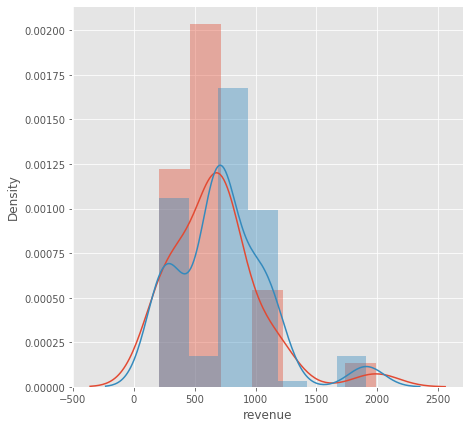

In [191]:
distplot_graph(df.query('group == "A" & country != "Russia" & country != "Sweden"').revenue, 
               df.query('group == "B" & country != "Russia" & country != "Sweden"').revenue)

#### Вывод: предварительно можно сказать что revenue пользователей с " выпавшими данными" распределены относительно нормально.

Видно что эти данные не относятся к тем высоким значениям, которые можно было принять за выбросы и распределены
они в той области мод revenue.
Поэтому в этом случае мне кажется менее критичным исключение их из датасета для исследований.

In [54]:
#  Создаю функцию для построения боксплотов:

def boxplot_graphs(df1):
    
    plt.figure(figsize=(16,16))

    return sns.boxplot(x='group', y ='revenue', data=df1)

#### Строю боксплоты чтобы оценить наличие выбросов в контрольной и тестовой группах в России:

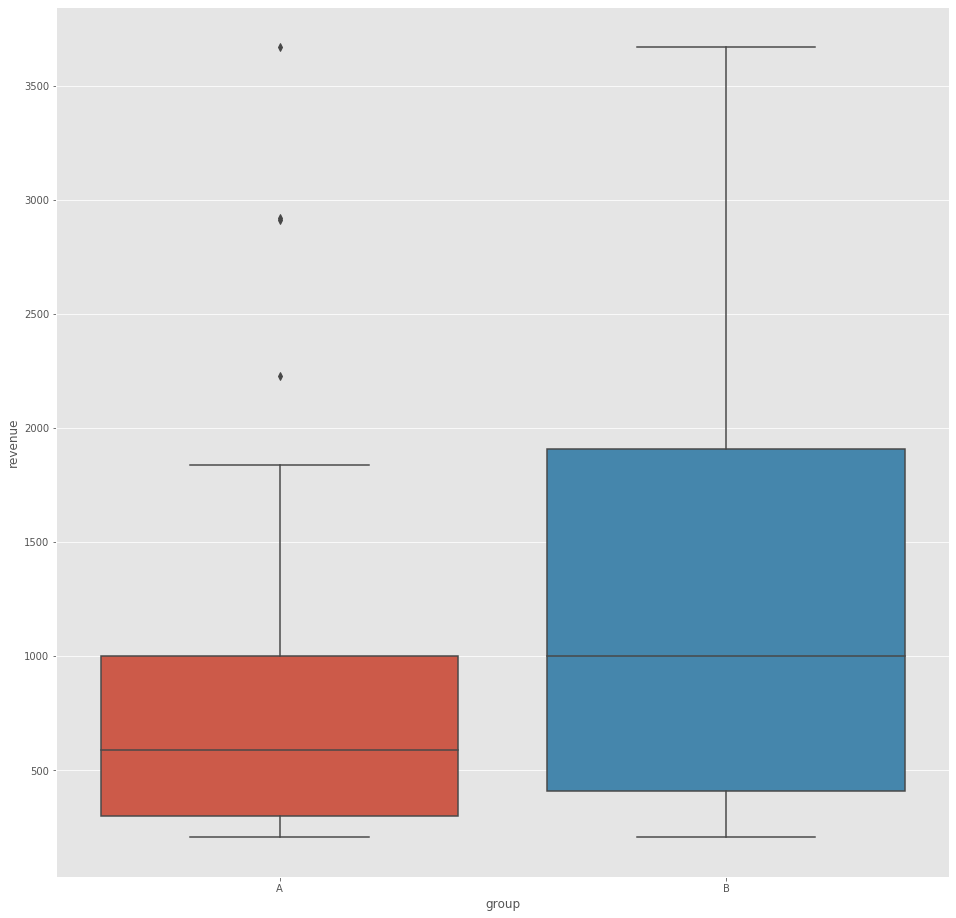

In [56]:
boxplot_graphs(control_rus.append(test_rus))

#### Вывод: 

в контрольной группе в России наблюдаются точки, которые лежат далеко за пределами усов боксплота, и которые на первый взгляд выглядят как сильные выбросы. С другой стороны я вижу что они лежат внутри усов боксплота тестовой группы, для пользователей которой был увеличена стоимость Приложения. 
Исходя из этого считаю что эти точки не стоит сходу рассматривать как выбросы, а интерпретировать, например, так: в тестовой группе значительно вырос средний чек таким образом, что разовые покупки, которые раньше выглядели как исключения, стали почти нормой. Из анализа этого графика можно сделать предварительный вывод о том, что клиенты в целом были готовы к переходу на новую модель оплаты. Конверсия не изменилась, при том что средний чек значительно вырос и то что раньше можно было воспринять как выброс стало нормой при новой модели ценообразования. 
Думаю что я принял правильное решение исследовать Россию и Швецию по-отдельности, потому что при анализе аналогичного графика по 2м странам как единого целого гораздо сложнее понять причину возникновения выбросов.

#### Строю боксплоты чтобы оценить наличие выбросов в контрольной и тестовой группах в Швеции:

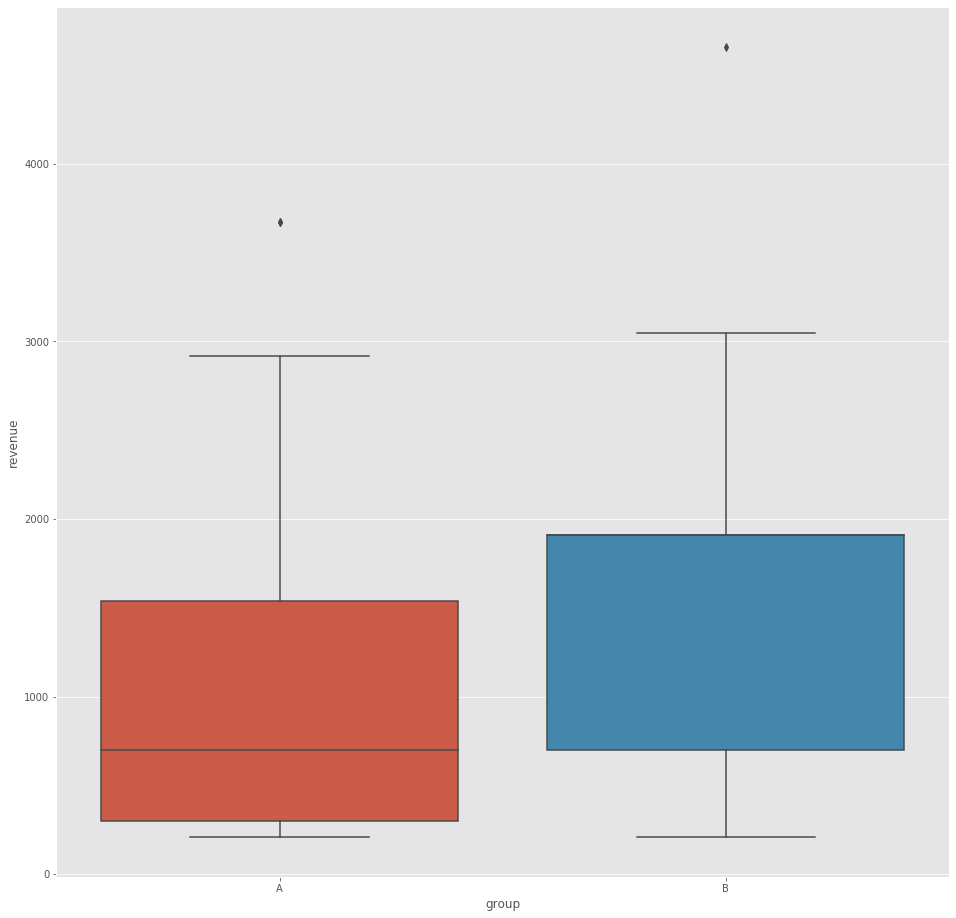

In [53]:
boxplot_graphs(control_swe.append(test_swe))

#### Вывод: 

в контрольной и в тестовой группах в Швеции наблюдаются сильные выбросы, но исходя из характера "выбросов" в России рискну предположить что отдельные большие покупки и в Швеции не стоит рассматривать как выбросы, поэтому не буду исключать их из дальнейшего анализа.

In [59]:
#### Создаю функцию для построения графика распределения:

def distplot_graph(serie1, serie2):
    
    plt.figure(figsize=(7,7))
    
    return sns.distplot(serie1), sns.distplot(serie2)

#### Строю графики распределения контрольной и тестовой группах в России:

(<matplotlib.axes._subplots.AxesSubplot at 0x116da808>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116da808>)

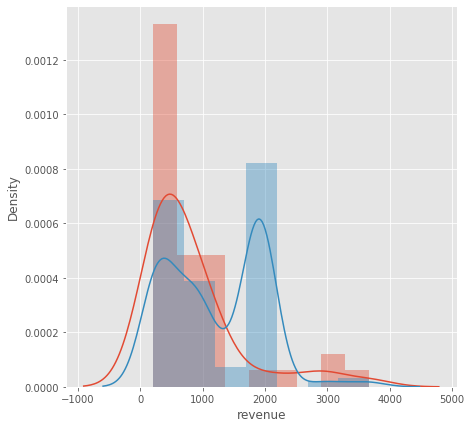

In [60]:
distplot_graph(control_rus.revenue, test_rus.revenue)

#### Смотрю график распределения контрольной и тестовой групп в Швеции:

(<matplotlib.axes._subplots.AxesSubplot at 0x11705288>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11705288>)

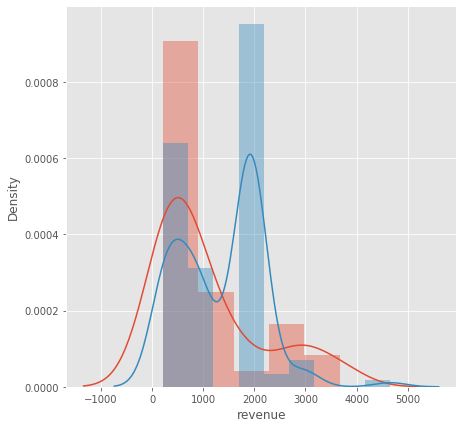

In [61]:
distplot_graph(control_swe.revenue, test_swe.revenue)

#### Вывод: 

очевидно, распределения далеки от нормального. Тем не менее подтвержу это тестом Шапиро-Уилка:

In [239]:
# Создаю функцию для проверки распределений на нормальность:

def norm_test(serie):
    
    stat, p = scipy.stats.shapiro(serie)
    print('Statistics=%.3f, p-value=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        outcome = 'Принимаю гипотезу о нормальности'
    else:
        outcome = 'Отклоняю гипотезу о нормальности'
        
    return print(outcome)

#### Тест на нормальность для России:

In [91]:
norm_test(control_rus.revenue)

Statistics=0.712, p-value=0.000
Отклоняю гипотезу о нормальности


In [92]:
norm_test(test_rus.revenue)

Statistics=0.856, p-value=0.000
Отклоняю гипотезу о нормальности


#### Тест на нормальность для Швеции:

In [94]:
norm_test(control_swe.revenue)

Statistics=0.771, p-value=0.000
Отклоняю гипотезу о нормальности


In [97]:
norm_test(test_swe.revenue)

Statistics=0.847, p-value=0.000
Отклоняю гипотезу о нормальности


#### Выводы:

тест Шапиро-Уилка подтверждает увиденное на графиках - распределения не нормальные;    
с другой стороны распределения значений в тестовом и контрольном датасетах достаточно равномерные;
так как количество данных в контрольной и тестовой выборках сильно отличаются, а Манн-Уитни привередлив к дисбалансу в размерах выборок, что приводит в первую очередь к ослаблению мощности критерия (чем сильнее дисбаланс, тем реже критерий будет обнаруживать реальную разницу (эффект)), то в качестве основного метода проверки гипотезы буду использовать Bootstrap для сравнения медианного чека (наличие ряда очень высоких покупок сильно  влияет на среднее значение), и только подкреплю результат исследованием при помощи метода Mанна Уитни - несмотря на то что bootstrap проверяет равенство средних, а Манн Уитни проверяют равенство распределений, т.е. немного разные гипотезы, считаю это полезным.

#### Создам функцию для применения метода bootstrap:

In [199]:
# критерий median (основной):

def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

# критерий mean (из любопытства):

def get_bootstrap_mean(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"ci": ci, 
            "p_value": p_value}

#### Формулирую гипотезу:

H0 - отсутствие статистически значимого отличия среднего и медианного значения revenue в тестовой и контрольной группах.

H1 - среднее и медианное значения revenue в тестовой и контрольной группах статистически значимо различаются.

#### Применяю bootstrap для сравнения изначальной тестовой и контрольной выборок:

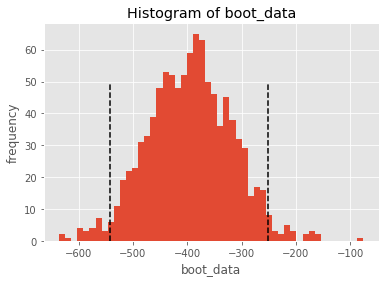

{'boot_data': [-497.0406091370558,
  -532.0406091370559,
  -474.33502538071065,
  -294.2791878172589,
  -342.11675126903555,
  -430.8781725888325,
  -512.736040609137,
  -463.6243654822335,
  -392.0456852791878,
  -406.43654822335026,
  -464.46192893401013,
  -400.97969543147207,
  -381.4517766497462,
  -214.0,
  -378.61421319796955,
  -398.28934010152284,
  -388.9543147208122,
  -388.5837563451777,
  -366.61421319796955,
  -464.6395939086294,
  -463.20304568527916,
  -430.55837563451774,
  -397.20812182741116,
  -349.8578680203046,
  -435.56852791878174,
  -316.4060913705584,
  -345.9543147208122,
  -393.8477157360406,
  -484.6802030456853,
  -374.5482233502538,
  -548.3451776649746,
  -385.56345177664974,
  -460.9441624365482,
  -462.48223350253807,
  -266.93908629441626,
  -480.11167512690355,
  -432.9238578680203,
  -361.1370558375635,
  -635.9238578680203,
  -510.46700507614213,
  -315.34010152284264,
  -425.9695431472081,
  -269.1370558375635,
  -397.5482233502538,
  -436.0710659

In [193]:
# Для АБ-теста в России:

get_bootstrap(control_rus.revenue, test_rus.revenue)

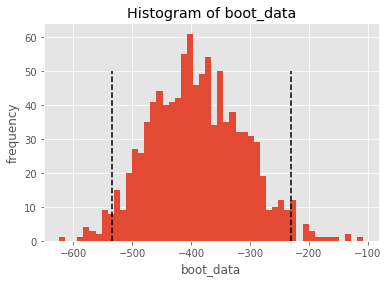

{'ci':                 0
 0.025 -534.030076
 0.975 -229.755964, 'p_value': 7.362967427914046e-07}

In [200]:
get_bootstrap_mean(control_rus.revenue, test_rus.revenue)

#### Вывод: бутстрэп-тэст дал значения одного порядка при сравнения медиан и средних значений.

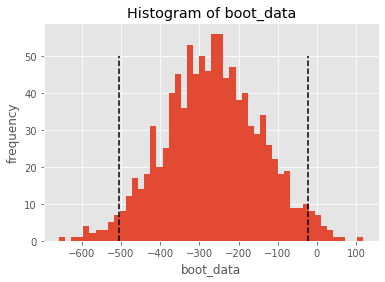

{'boot_data': [-116.02564102564102,
  -240.32478632478632,
  -37.65811965811966,
  -199.64957264957266,
  -257.8974358974359,
  -287.53846153846155,
  -466.44444444444446,
  -330.7264957264957,
  -239.25641025641025,
  -132.9059829059829,
  -238.6239316239316,
  -369.017094017094,
  -22.324786324786324,
  -344.9316239316239,
  -291.28205128205127,
  -329.13675213675214,
  -425.0,
  -450.94871794871796,
  -187.57264957264957,
  -341.36752136752136,
  -483.0,
  -278.14529914529913,
  -211.25641025641025,
  -232.0854700854701,
  -373.04273504273505,
  -225.54700854700855,
  -1.9743589743589745,
  -369.64102564102564,
  -416.88034188034186,
  -134.68376068376068,
  -243.1196581196581,
  7.034188034188034,
  -362.7435897435897,
  -377.5982905982906,
  -357.20512820512823,
  -272.65811965811963,
  -524.2564102564103,
  -216.45299145299145,
  -548.7692307692307,
  -173.66666666666666,
  -392.5811965811966,
  -85.02564102564102,
  -315.3333333333333,
  -412.8205128205128,
  -84.1025641025641,


In [201]:
# Для АБ-теста в Швеции:

get_bootstrap(control_swe.revenue, test_swe.revenue)

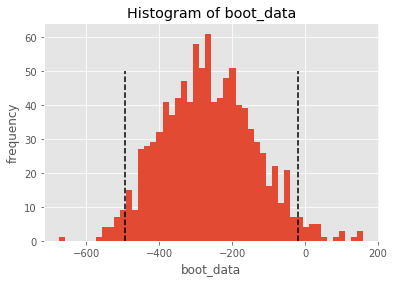

{'ci':                 0
 0.025 -494.156838
 0.975  -18.873504, 'p_value': 0.03581536122568109}

In [202]:
get_bootstrap_mean(control_swe.revenue, test_swe.revenue)

#### Вывод: 

бутстрэп-тэст дал значение одного порядка для сравнения медианы и среднего значения.

1. Для исследований в России: в ходе проверки статистической гипотезы при помощи сравнения медиан и средних значений получено значение p-value << 0.05, что не позволяет мне принять нулевую гипотезу об отсутствии статистически значимых изменений среднего и медианного здначений revenue между контрольной и тестовой группами.

2. Для исследований в Швеции: в ходе проверки статистической гипотезы при помощи сравнения медиан и средних значений получено значение p-value > 0.05, что не позволяет мне отклонить нулевую гипотезу об отсутствии статистически значимых изменений среднего и медианного здначений revenue между контрольной и тестовой группами.

#### Очень интересные предварительные выводы:

при исследовании изменения медианного и среднего чека в России я получил значение уровня значимости << 0.5, в то время как при исследовании аналогичных метрик для Швеции я получил значение p-value > 0.05.

#### Сравню распределения при помощи метода Манна-Уитни:

#### Формулирую гипотезу для проверки при помощи метода Манна-Уитни:

H0 - распределение revenue в тестовой выборке соответствует распределению признака в контрлдбной выборке.
H1 - распределение revenue в тестовой выборке не соответствует распределению признака в  контрольной  выборке.

In [204]:
# Тестовая и контрольная выборки (Россия):

mannwhitneyu(control_rus.revenue, test_rus.revenue)

MannwhitneyuResult(statistic=2925.5, pvalue=0.0007349908246736278)

In [205]:
# Тестовая и контрольная выборки (Швеция):

mannwhitneyu(control_swe.revenue, test_swe.revenue)

MannwhitneyuResult(statistic=1577.5, pvalue=0.019791400408356963)

#### Вывод:

1. Для исследований в России: в ходе проверки статистической гипотезы при помощи сравнения медиан и средних значений получено значение p-value << 0.05, что не позволяет мне принять нулевую гипотезу об отсутствии статистически значимых изменений среднего и медианного здначений revenue между контрольной и тестовой группами.

2. Для исследований в Швеции: в ходе проверки статистической гипотезы при помощи сравнения медиан и средних значений получено значение p-value > 0.05, что не позволяет мне отклонить нулевую гипотезу об отсутствии статистически значимых изменений среднего и медианного здначений revenue между контрольной и тестовой группами.

### Основной вывод я привоу после второго исследования в ячейке 259.

#### Сценарий где я исследую статистичесткую значимость изменений, полученных в результате АБ-теста рассматривая Россию и Швецию как единый рынок.

#### Произвожу разделение смердженного датасета на тестовую и контрольную группы (только активных и купивших пользователей):

In [251]:
df_control = df.query('group == "A" & revenue > 0')

df_test = df.query('group == "B" & revenue > 0')

#### Смотрю насколько изменились важные параметры в тестовой и контрольной группах:

In [233]:
before_after_params(df_control, df_test)

              Control               Test                     Difference
0   Paying conversion  Paying conversion   Paying conversion difference
1             6.82833            6.82833                      -0.559376
2             Revenue            Revenue             Revenue difference
3               93162             485575                         392413
4                ARPU               ARPU                ARPU difference
5             59.4525            70.1394                        10.6869
6                 AOV                AOV                 AOV difference
7             870.673            1118.84                        248.164
8           num_users          num_users  Difference in number of users
9               14693              59883                          45190
10       active users       active users        Active users difference
11               1567               6923                           5356
12       Revenue mean       Revenue mean        Revenue_mean_dif

#### Вывод:
    
Насколько я понял задачу - исследуются клиенты из имеющейся клиентской базы (все пользователи о которых до начала 
эксперимента было известно изначально разделены на 2 группы в файле groups и часть из них в течение тестового периода 
пользовалась Приложением, часть его приобрела, новые уникальные пользователи в ходе эксперимента не появились).

Из сравнения параметров тестовой и контрольной выборок и смены модели оплаты коллекций шаблонов в тестовой группе на новую, можно сделать предварительные выводы о том, что в результате:
    
на 0.6% снизилась конверсия активных клиентов в покупку;
revenue увеличилась на 392 413 у.е.;
ARPU вырос на 10.7 у.е.;
AOV вырос на 248.1 у.е.

При этом важно учитывать, что в тестовой группе по сравнению в с контрольной оказалось
на 5356 больше пользователей;
на 327 возросло количество покупателей.

#### Строю боксплоты чтобы оценить наличие выбросов в контрольной и тестовой группах:

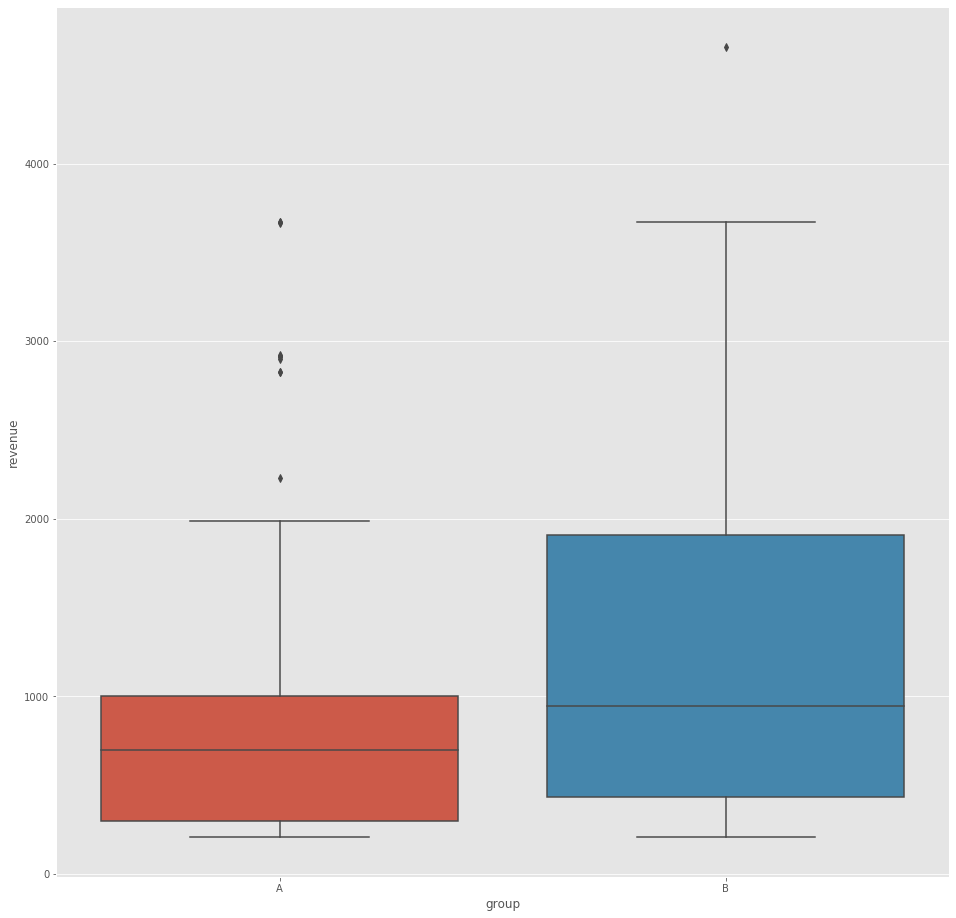

In [234]:
boxplot_graphs(df_control.append(df_test))

#### Вывод:

в контрольной группе наблюдаются точки, которые лежат далеко за пределами усов боксплота, и которые на первый взгляд выглядят как сильные выбросы. С другой стороны я вижу что они лежат внутри усов боксплота тестовой группы, для пользователей которой был увеличена стоимость Приложения. 
Исходя из этого считаю что эти точки не стоит сходу рассматривать как выбросы, а интерпретировать, например, так: в тестовой группе значительно вырос средний чек таким образом, что разовые покупки, которые раньше выглядели как исключения, стали почти нормой. Из анализа этого графика можно сделать предварительный вывод о том, что клиенты в целом были готовы к переходу на новую модель оплаты. Конверсия не изменилась, при том что средний чек значительно вырос и то что раньше можно было воспринять как выброс стало нормой при новой модели ценообразования.

#### Исследую данные, которые похои на выбросы:  выберу именно эти данные и постараюсь понять причину их возникновения.

#### Создаю функцию, считающую межквартильный размах:

In [235]:
def iqr_interval(serie1, serie2):
        
    # Считаю верхний и нижний перцентили:
    
    q1_control = np.nanpercentile(df_control.revenue, 25)    
    q3_control = np.nanpercentile(df_control.revenue, 75)

    q1_test = np.nanpercentile(df_test.revenue, 25)    
    q3_test = np.nanpercentile(df_test.revenue, 75)


    iqr_control = q3_control - q1_control
    iqr_test = q3_test - q1_test
    
    
    return iqr_control, iqr_test, q3_control, q3_test

# Записываю результат работы функции в переменную:

interval = iqr_interval(df_control.revenue, df_test.revenue)

# Смотрю на выбросы, определенные по правилу межквартильного размаха в контрольной группе:

upper = df_control.query('revenue >= (@interval[2] + 1.5 * @interval[0])')

upper.sort_values('country')

,user_id,country,platform,sex,revenue,group
1175,3674,Russia,ios,female,2229.0,A
5445,2206,Russia,android,female,2910.0,A
5671,8025,Russia,ios,female,2921.0,A
8243,7950,Russia,ios,male,3669.0,A
429,1673,Sweden,android,male,2899.0,A
1082,3481,Sweden,android,male,2829.0,A
1988,591,Sweden,ios,female,3670.0,A
2517,392,Sweden,android,male,2920.0,A
2856,2093,Sweden,android,male,2828.0,A
4121,1606,Sweden,android,male,3671.0,A


#### Смотрю на выбросы, определенные по правилу межквартильного размаха в тестовой группе:

In [236]:
upper = df_test.query('revenue >= (@interval[3] + 1.5 * @interval[1])')

upper.sort_values('country')

,user_id,country,platform,sex,revenue,group
7286,3988,Sweden,ios,female,4660.0,B


#### Выводы:

в тестовой группе есть 1 явный выброс. Возможно, это корпоративный клиент, или администратор инстаграмм, под акаунтом которого работает группа администраторов, ведущие несколько каналов и обрабатывающих очень большое количество контента (в случае если Приложение чарджит за количество обрабатываемого контента);

возможно, это баг системы - нужно лучше понимать специфику бизнеса, запросить логи в Службе Поддержки.

В контрольной группе есть 10 выбросов. Вероятно их можно объяснить теми же причинами.

Принимаю решение оставить крайние значения и не рассматривать их в данной ситуации как выбросы.

#### Выбираю оптимальный способ для проверки статистической значимости результатов АВ-теста. Смотрю график распределения в контрольной и тестовой группах:

(<matplotlib.axes._subplots.AxesSubplot at 0x114e1cc8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x114e1cc8>)

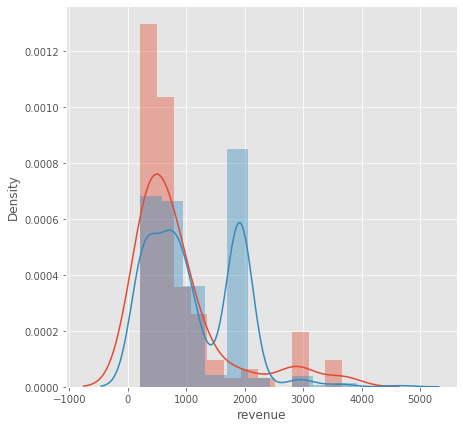

In [237]:
distplot_graph(df_control.revenue, df_test.revenue)

#### Несмотря на то что визуально формы распределения отличаются от нормального подтвержу результат тестом Шапиро-Уилка:

In [253]:
norm_test(df_control.revenue)

Statistics=0.720, p-value=0.000
Отклоняю гипотезу о нормальности


In [254]:
norm_test(df_test.revenue)

Statistics=0.868, p-value=0.000
Отклоняю гипотезу о нормальности


#### Вывод: так как выборки достаточно малы и имеют распределение отличное от нормального - отказываюсь от применения метода t-Стьюдента, который, однако, дает максимально точный результат, учитывая и величину чека клиента.

#### Создаю функцию для проверки равномерности распределения данных в датасетах:¶

In [245]:
def uniformity(df1, df2):
    
    return print('Values distribution in the Control dataset:'), \
           print(df1['country'].agg([pd.Series.value_counts, lambda x: x.value_counts(normalize=True)])), \
           print(df1['platform'].agg([pd.Series.value_counts, lambda x: x.value_counts(normalize=True)])), \
           print(df1['sex'].agg([pd.Series.value_counts, lambda x: x.value_counts(normalize=True)])), \
           print(' \n '),\
           print('Values distribution in the Test dataset:'), \
           print(df2['country'].agg([pd.Series.value_counts, lambda x: x.value_counts(normalize=True)])), \
           print(df2['platform'].agg([pd.Series.value_counts, lambda x: x.value_counts(normalize=True)])), \
           print(df2['sex'].agg([pd.Series.value_counts, lambda x: x.value_counts(normalize=True)]))

uniformity(df_control, df_test)

Values distribution in the Control dataset:
        value_counts  <lambda>
Russia           915  0.594928
Sweden           623  0.405072
         value_counts  <lambda>
android           834  0.542263
ios               704  0.457737
        value_counts  <lambda>
male             785  0.510403
female           753  0.489597
 
 
Values distribution in the Test dataset:
        value_counts  <lambda>
Russia          4492  0.660297
Sweden          2311  0.339703
         value_counts  <lambda>
android          3787  0.556666
ios              3016  0.443334
        value_counts  <lambda>
male            3411  0.501396
female          3392  0.498604


(None, None, None, None, None, None, None, None, None)

#### Выводы:

распределение значений в тестовом и контрольном датасетах достаточно равномерное;

так как количество данных в контрольной и тестовой выборках сильно отличаются а Манн-Уитни привередлив к дисбалансу в размерах выборок, что приводит в первую очередь к ослаблению мощности критерия (чем сильнее дисбаланс, тем реже критерий будет обнаруживать реальную разницу (эффект)), то в качестве основного метода проверки гипотезы буду использовать Bootstrap, и только подкреплю результат исследованием при помощи метода Mанна Уитни;

несмотря на то что bootstrap проверяет равенство средних, а Манн Уитни проверяют равенство распределений, т.е. немного разные гипотезы, считаю это полезным.

#### Создаю функцию, которая позволит проверять гипотезы с помощью бутстрапа для оценки медиан и средних значений:

#### Формулирую гипотезу:

H0 - отсутствие статистически значимого отличия среднего и медианного значения revenue в тестовой и контрольной группах.

H1 - среднее и медианное значения revenue в тестовой и контрольной группах статистически значимо различаются.

#### Проверяю гипотезу сравнивая медианы revenue:

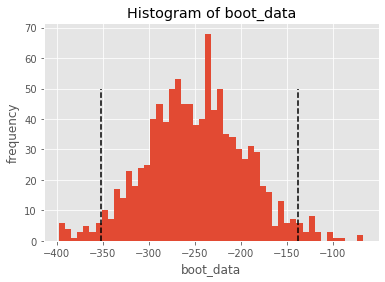

{'boot_data': [-230.6290322580645,
  -216.52073732718895,
  -158.4331797235023,
  -268.87327188940094,
  -227.06221198156683,
  -188.63594470046084,
  -205.3963133640553,
  -187.18663594470047,
  -225.00460829493088,
  -262.8824884792627,
  -247.41244239631337,
  -236.98387096774192,
  -235.05990783410138,
  -296.8824884792627,
  -218.92857142857142,
  -244.72811059907835,
  -251.55990783410138,
  -292.5806451612903,
  -351.8640552995392,
  -209.00460829493088,
  -213.99078341013825,
  -121.92626728110599,
  -220.463133640553,
  -203.29493087557603,
  -280.2764976958525,
  -239.83870967741936,
  -346.95391705069125,
  -170.73502304147465,
  -161.41705069124424,
  -173.09907834101384,
  -281.3041474654378,
  -241.09677419354838,
  -269.14285714285717,
  -272.7488479262673,
  -186.18433179723502,
  -293.6520737327189,
  -294.12442396313367,
  -190.2442396313364,
  -121.06451612903226,
  -296.0599078341014,
  -309.7027649769585,
  -233.26036866359448,
  -248.93778801843317,
  -185.7465437

In [255]:
get_bootstrap(df_control.revenue, df_test.revenue)

#### Проверяю гипотезу сравнивая средние значения revenue:

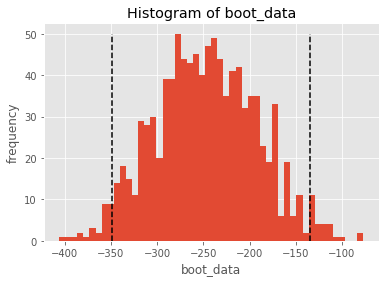

{'ci':                 0
 0.025 -348.965495
 0.975 -134.935599, 'p_value': 6.643822407596964e-06}

In [256]:
get_bootstrap_mean(df_control.revenue, df_test.revenue)

#### Вывод: 

в ходе проверки статистической гипотезы при помощи сравнения медиан и средних значений получено значение p-value << 0.05, что не позволяет мне принять нулевую гипотезу об отсутствии статистически значимых изменений среднего и медианного здначений revenue между контрольной и тестовой группами.

#### Формулирую гипотезу для проверки при помощи метода Манна-Уитни:

H0 - распределение revenue в тестовой выборке соответствует распределению признака в контрлдбной выборке.
H1 - распределение revenue в тестовой выборке не соответствует распределению признака в  контрольной  выборке.

#### Произвожу проверку при помощи метода Манна-Уитни:

In [258]:
mannwhitneyu(df_control.revenue, df_test.revenue)

MannwhitneyuResult(statistic=17699.5, pvalue=6.82355138697427e-05)

#### Вывод:

Полученное значение статистической значимости << 0.05 не позволяет мне принять гипотезу о том, что распределение revenue в тестовой выборке соответствует распределению признака в контрольной выборке.

Распределения revenue в тестовой выборке значимо отличается от распределения revenue в контрольной выборке.

#### Вывод:

С помощью бутстрапа я проверил нулевую гипотезу о равенстве средних, а при помощи теста Манна-Уитни гипотезу о равенстве распределений как на данных с выбросами, так и на очищенных данных.

Несмотря на то что тестовая выборка имеет большие выбросы, что сильно искажает нам среднее значение Проведенные тесты дали значение p-value << 0.05, поэтому считаю что полученные в ходе эксперимента отличия являются статистически значимыми.

Несмотря на снижение конверсии активных пользователей в активных клиентов в покупку, revenue увеличилась на 392 413 у.е., ARPU вырос на 10.7 у.е., AOV вырос на 248.1 у.е.

C учетом доверительных интервалов принимаю решение рекомендовать выкатить изменения на всю аудиторию.

#### Окончательный вывод:

Предлагаю выкатывать изменения на всю Российскую аудиторию. Несмотря на снижение конверсии активных пользователей в активных клиентов в покупку, средний чек статистически значимо вырос, revenue увеличилась на 204 305 у.е., ARPU вырос на 392 у.е., количество платящих клиентов на 154 человека.

Перед тем как выкатывать изменения на всю Шведскую аудиторию рекоммендую провести дополнительные тесты (есть вероятность что изменения в таком виде не приведут к значимому росту среднего чека покупателей).

### Задача 2:

Одной из основных задач аналитика является не только построение моделей, но и создание дашбордов, 
которые позволяют отслеживать изменения метрик и принимать на их основе оптимальные решения. 
Ваш руководитель хочет узнать, как обстоят дела с использованием приложения и вовлечённостью 
пользователей, и очень просит спроектировать ему дашборд.

Предложите метрики, которые помогли бы ему отслеживать вовлеченность пользователей и принимать 
оптимальные решения. Какую основную информацию вы бы отразили на дашборде? На какие метрики стоит 
обратить внимание в первую очередь? Почему?

#### В этот раз я дополнил решение dashboard canvas-ом и для удобства высылаю ссылку на power point презентацию, которая содерит и канвас и дашборд и описание: 

https://disk.yandex.ru/i/mWU07uy1N9t03A

#### Спасибо за внимание!